In [58]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

In [59]:
# load audio file
# from_video_path = "../audios/gBR_sBM_cAll_d04_mBR0_ch01.mp3"
from_video_path = "../audios/snare_piano.mp3"
ipd.Audio(from_video_path)

In [89]:
# sr = sample rate is the number of sample in one second
from_video, sr = librosa.load(from_video_path, sr=22050)

/Users/giovanni/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [90]:
# sample rate is the number of sample in one second
# from_video.size is the number of sample in this audio
from_video.size 

86976

In [94]:
# sample = frame
sample_duration = 1/sr
print(f"Frame Length : {sample_duration:.6} s")

Frame Length : 4.53515e-05 s


In [95]:
duration = sample_duration * from_video.size 
print(f"The video length is : {duration:.6} s")

The video length is : 3.94449 s


In [130]:
#  calculate the amplitude envelope
def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
#     calculate for each frame
    for i in range(0, len(signal), hop_length):
        current_frame_ae = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_ae)
    
    return np.array(amplitude_envelope)

In [131]:
FRAME_SIZE = 1024
HOP_LENGTH = 800

ae = amplitude_envelope(from_video, FRAME_SIZE, HOP_LENGTH)
len(ae)


109

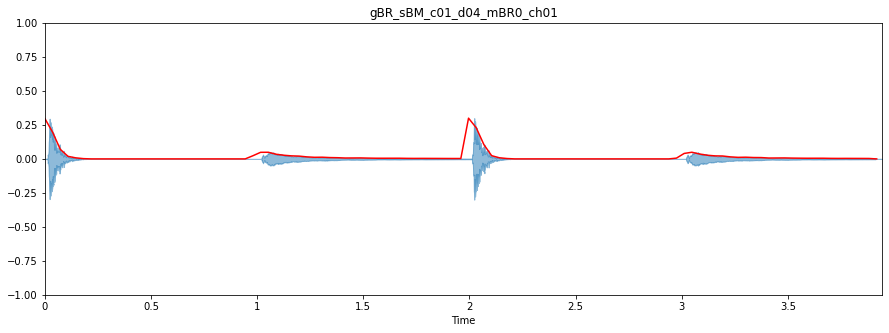

In [132]:
# Visualize

frames = range(0, ae.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))
plt.subplot(3,1,1)
librosa.display.waveplot(from_video, alpha=0.5)

plt.plot(t, ae, color='r')
plt.title("gBR_sBM_c01_d04_mBR0_ch01")
plt.ylim((-1, 1))

plt.show()

In [122]:
print(t.size)

109
